<div>
    <img src='../../pics/banner.PNG'/>
</div>
<div>
    <img width="10%" height="10%" src='../../pics/python-programming.png'/>
    <img src='../../pics/miw.PNG'/>
</div>
<div>
    <em>Author: Jeroen Boogaard</em>
</div>

<h1>Samengestelde variabelen - Sets</h1>

**Een set is een <u>mutable</u> dataverzameling van <u>unieke</u> elementen.**

<div>
    <img width="25%" height="25%" src='../../pics/pioneer.jpg'/>
</div>

<h3>Imports</h3>

In [12]:
from os import system

In [13]:
system("(pip list | grep geopandas) && (pip list | grep matplotlib-venn) && (pip list | grep contextily) || pip install -r ../pip/requirements.txt")

0

In [14]:
import contextily as ctx
import geopandas as gpd
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

<h3>Set variabelen aanmaken en afdrukken</h3>

In [3]:
spaceCrafts = set()
spaceCrafts = {"Pioneer", "Voyager"}
print(spaceCrafts)

{'Pioneer', 'Voyager'}


In [4]:
spaceCrafts.add("Voyager")

In [5]:
print(spaceCrafts)

{'Pioneer', 'Voyager'}


<h3>Exercise 1</h3>
<h4>Gegeven</h4>

In [6]:
def fiboSeqList(n):
    if n <= 1:
        return n
    else:
        return(fiboSeqList(n-1) + fiboSeqList(n-2))
    
fibonacciList = [fiboSeqList(i) for i in range(0,15)]    
print(fibonacciList)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


<h4>Gevraagd</h4>
<p>Maak gebruik van <u>cast</u> om variabele <i>fibonacciList</i> te ontdubbelen</p>

<h4>Oplossing</h4>

In [7]:
# Oplossing
fibonacciList = list(set(fibonacciList))

<h3>Operaties</h3>

In [17]:
nordics = {"Denmark", "Finland", "Iceland", "Norway"}
baltics = {"Estonia", "Latvia", "Lithuania"}
eu = {"Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"}

<h3>Exercise 2</h3>
<h4>Gegeven</h4>

In [9]:
benelux = {"Belgium", "Netherlands", "Luxembourg"}
benStr = ""
benList = list()

<h4>Gevraagd</h4>
<ul>
<li>Maak een String benStr met als <u>value</u> "BeNeLux" die is opgebouwd uit de letters van corresponderende items uit de set <i>benelux</i> zonder de set variabele zelf aan te passen</li>
<li>Maak een List benList met als <u>value</u> ["BE", "NL" "LU"] die is opgebouwd uit de letters van corresponderende items uit de set <i>benelux</i> zonder de set variabele zelf aan te passen</li>
</ul>

<h4>Oplossing</h4>

In [10]:
# Oplossing

# In welke volgorde staan de elementen van de set benelux echt?
print(benelux)

# Maak een kopie van set benelux
benelux1 = benelux.copy()

# Maak eerst een benList met lege waarden
benList = [None] * 3

# Voeg de elementen uit de set in de juist volgorde toe aan de list
# Gebruik String slicing voor het selecteren van letters
netherlands = benelux1.pop()
benList[1] = f"{netherlands[0]}{netherlands[6]}".upper() 
benList[0] = benelux1.pop()[:2].upper() 
benList[2] = benelux1.pop()[:2].upper() 

print(benList)

# Maak een kopie van set benelux
benelux2 = benelux.copy()

# Maak een tweede list en aangepaste landcodes
benList2 = [None] * 3
benList2[1] = benelux2.pop()[:2].title() 
benList2[0] = benelux2.pop()[:2].title() 
benList2[2] = benelux2.pop()[:3].title() 

# print(benList2)

# Gebruik join voor het maken van benStr 
benStr = "".join(benList2)
print(benStr)

{'Netherlands', 'Luxembourg', 'Belgium'}
['LU', 'NL', 'BE']
LuNeBel


<h3>Visualisatie</h3>

**We gebruiken geopandas voor het visualiseren van een landkaart en filteren op de 2-letterige landcode**

In [15]:
# Geografische data inlezen
data_dir = "../../geo/ref-nuts-2021-01m/"
euPath = data_dir + "NUTS_RG_01M_2021_3035_LEVL_1.json"
gdf = gpd.read_file(euPath)

# Coordinatensysteem
gdf.crs = "EPSG:3035"

# Filteren landen m.b.v. codes uit benList
gdfBen = gdf[(gdf.CNTR_CODE == benList[0]) | (gdf.CNTR_CODE == benList[1]) | (gdf.CNTR_CODE == benList[2])] if len(benList)==3 else gdf[(gdf.CNTR_CODE == "NL")]

# Conversie Coordinaten
gdfCrsBen = gdfBen.to_crs("EPSG:3857")

# Plot
ax = gdfCrsBen.plot(figsize=(8,6), color="lightgray")

# Grenzen Benelux landen
gdfCrsBen.boundary.plot(color="darkgreen", ax=ax)

# Achtergrondkaart
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.HOT)

DriverError: ../../geo/ref-nuts-2021-01m/NUTS_RG_01M_2021_3035_LEVL_1.json: No such file or directory

**Gebruik <i>union</i> om verzamelingen verenigen**

In [18]:
subUnion = benelux.union(nordics).union(baltics)
print(subUnion)

{'Lithuania', 'Iceland', 'Belgium', 'Luxembourg', 'Latvia', 'Finland', 'Norway', 'Estonia', 'Netherlands', 'Denmark'}


<p>De Sets benelux, nordics en baltics zijn allen een eigen <strong>subset</strong> van eu</p>

<p>Niet alle landen uit <i>subUnion</i> zijn lid van de Europese Unie</p>

In [19]:
baltics.issubset(eu) and benelux.issubset(eu) and nordics.issubset(eu)

False

**Gebruik de methode <i>intersection</i> voor de doorsnede van twee Sets**

In [20]:
eu.intersection(nordics)

{'Denmark', 'Finland'}

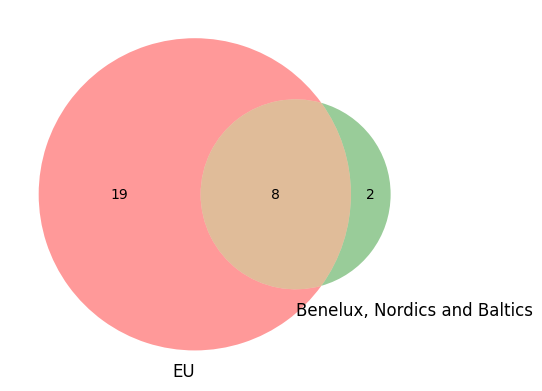

In [21]:
venn2([eu, subUnion], ('EU', 'Benelux, Nordics and Baltics'))
plt.show()

<h3>Exercise 3</h3>
<h4>Gegeven</h4>
<p>EU lidstaten die de euro (nog) niet hebben ingevoerd</p>

In [22]:
nonEuro = ['Bulgaria', 'Czech Republic', 'Denmark', 'Hungary', 'Poland', 'Romania', 'Sweden']

<h4>Gevraagd</h4>
<p>Gebruik de methode <u>difference</u> om EU landen weer te geven die <u>wel</u> lid zijn van de Eurozone</p>

<h4>Oplossing</h4>

In [23]:
# Oplossing
euro = eu.difference(nonEuro)
print(euro)

{'Ireland', 'Lithuania', 'Latvia', 'Malta', 'Slovenia', 'France', 'Cyprus', 'Italy', 'Greece', 'Austria', 'Germany', 'Spain', 'Belgium', 'Luxembourg', 'Finland', 'Slovakia', 'Czechia', 'Estonia', 'Netherlands', 'Croatia', 'Portugal'}


In [24]:
# Alternatieve oplossing m.b.v. List Comprehension
euro = [state for state in eu if state not in nonEuro]
print(euro)

['Ireland', 'Lithuania', 'Latvia', 'Malta', 'Slovenia', 'France', 'Cyprus', 'Italy', 'Greece', 'Austria', 'Germany', 'Spain', 'Belgium', 'Luxembourg', 'Finland', 'Slovakia', 'Czechia', 'Estonia', 'Netherlands', 'Croatia', 'Portugal']
